In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import joblib


In [2]:
DATA_PATH = 'data/heart_reduced.csv'
MODEL_DIR = 'models/'


In [3]:
df = pd.read_csv(DATA_PATH)
X = df.drop(columns=['target'])
y = df['target']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
models = {
'LogisticRegression': LogisticRegression(max_iter=1000),
'DecisionTree': DecisionTreeClassifier(random_state=42),
'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
'SVM': SVC(probability=True, kernel='rbf')
}

In [9]:
results = {}
for name, model in models.items():
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)
	y_proba = model.predict_proba(X_test)[:,1]
	acc = accuracy_score(y_test, y_pred)
	prec = precision_score(y_test, y_pred)
	rec = recall_score(y_test, y_pred)
	f1 = f1_score(y_test, y_pred)
	auc = roc_auc_score(y_test, y_proba)
	results[name] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'auc': auc}
	print(f"{name}:", results[name])
	joblib.dump(model, MODEL_DIR + f'{name}.pkl')

LogisticRegression: {'accuracy': 0.8688524590163934, 'precision': 0.8125, 'recall': 0.9285714285714286, 'f1': 0.8666666666666667, 'auc': np.float64(0.9632034632034633)}
DecisionTree: {'accuracy': 0.7377049180327869, 'precision': 0.7, 'recall': 0.75, 'f1': 0.7241379310344828, 'auc': np.float64(0.7386363636363636)}
RandomForest: {'accuracy': 0.8688524590163934, 'precision': 0.8125, 'recall': 0.9285714285714286, 'f1': 0.8666666666666667, 'auc': np.float64(0.9356060606060606)}
SVM: {'accuracy': 0.9344262295081968, 'precision': 0.9, 'recall': 0.9642857142857143, 'f1': 0.9310344827586207, 'auc': np.float64(0.9642857142857143)}


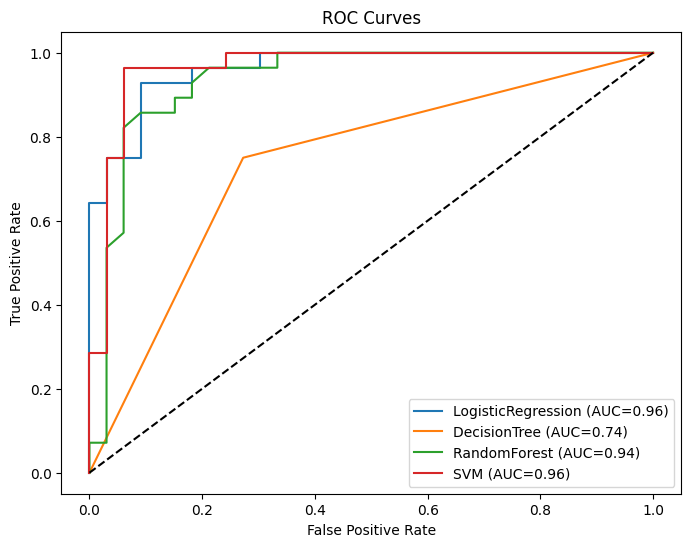

In [10]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [12]:
import os
import json
os.makedirs('results', exist_ok=True)
with open('results/evaluation_metrics.json', 'w') as f:
    json.dump(results, f, indent=2)
print('Saved metrics to results/evaluation_metrics.json')

Saved metrics to results/evaluation_metrics.json
